# РК-1
### Технологии машинного обучения
Самойлов Константин Михайлович, ИУ5-65Б, Вариант 14
Задача 2, датасет 6

# Задание
Для заданного набора данных проведите:
обработку пропусков в данных для:
- одного категориального
- одного количественного признака

**Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали?**

**Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?**

Для студентов группы ИУ5-65Б, ИУ5И-65Б - для набора данных построить "парные диаграммы".

# Решение

## Загрузка датасета
Для работы с набором данных буду использовать библиотеку pandas, так как это наиболее распространённый и простой в использовании инструмент для решения поставленной задачи.

In [2]:
import pandas as pd

data = pd.read_csv('Admission_Predict_Ver1.1.csv', sep=",")

## Первичный анализ

In [3]:
print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 500
Всего колонок: 9


In [4]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Для обработки пропущенных значений в данных этого датасета (Graduate Admission 2) мы можем использовать различные методы в зависимости от типа признака (категориальный или количественный).

### Для категориального признака:
Категориальный признак в данном случае отсутствует, но предположим, у нас есть категориальный признак, такой как "Region" (регион университета).

In [17]:
import numpy as np

regions = ['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Australia']

# Добавляем случайные значения для признака "Region"
data['Region'] = np.random.choice(regions, size=500)
data = pd.DataFrame(data)

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Region
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Asia
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Europe
2,3,316,104,3,3.0,3.5,8.00,1,0.72,South America
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Africa
4,5,314,103,2,2.0,3.0,8.21,0,0.65,South America


Теперь для обработки пропущенных значений мы можем воспользоваться методом замены пропусков на моду:
создать сценарий, где у нас есть пропущенные значения в признаке "Region", и заменить их на самый часто встречающийся регион.

In [19]:
# Заменяем пропущенные значения модой
data['Region'].fillna(data['Region'].mode()[0], inplace=True)

### Для количественного признака:
Количественные признаки включают GRE Score, TOEFL Score, SOP, LOR, CGPA и Chance of Admit.

Мы будем использовать для них замену пропусков на среднее или медиану:
- Для количественных признаков хорошим методом заполнения пропусков может быть замена их средним или медианой, чтобы сохранить статистические характеристики данных.

In [26]:
# Заменяем пропущенные значения медианой
categories = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

for i in categories:
    data[i].fillna(data[i].median(), inplace=True)

### Выбор признаков для модели машинного обучения:
Для построения моделей машинного обучения из этого набора данных можно использовать следующие признаки:
1. GRE Score
2. TOEFL Score
3. University Rating
4. SOP
5. LOR
6. CGPA
7. Research

Почему выбор этих признаков важен для моделирования:
- **Оценки (GRE и TOEFL):** Эти показатели являются важными для оценки академической подготовки студента.
- **Рейтинг университета:** Оценка университета, из которого поступает студент, может влиять на вероятность допуска.
- **SOP (Statement of Purpose) и LOR (Letter of Recommendation):** Эти признаки отражают мотивацию и рекомендации соответственно, что также важно для оценки кандидата.
- **CGPA (Cumulative Grade Point Average):** Это важный показатель успеваемости студента.
- **Research (Исследовательский опыт):** Наличие опыта исследований также может быть фактором в принятии решения.

*Использование этих признаков позволит построить модель, которая будет учитывать как академические, так и дополнительные факторы, влияющие на вероятность поступления в аспирантуру.*

## Парные диаграммы

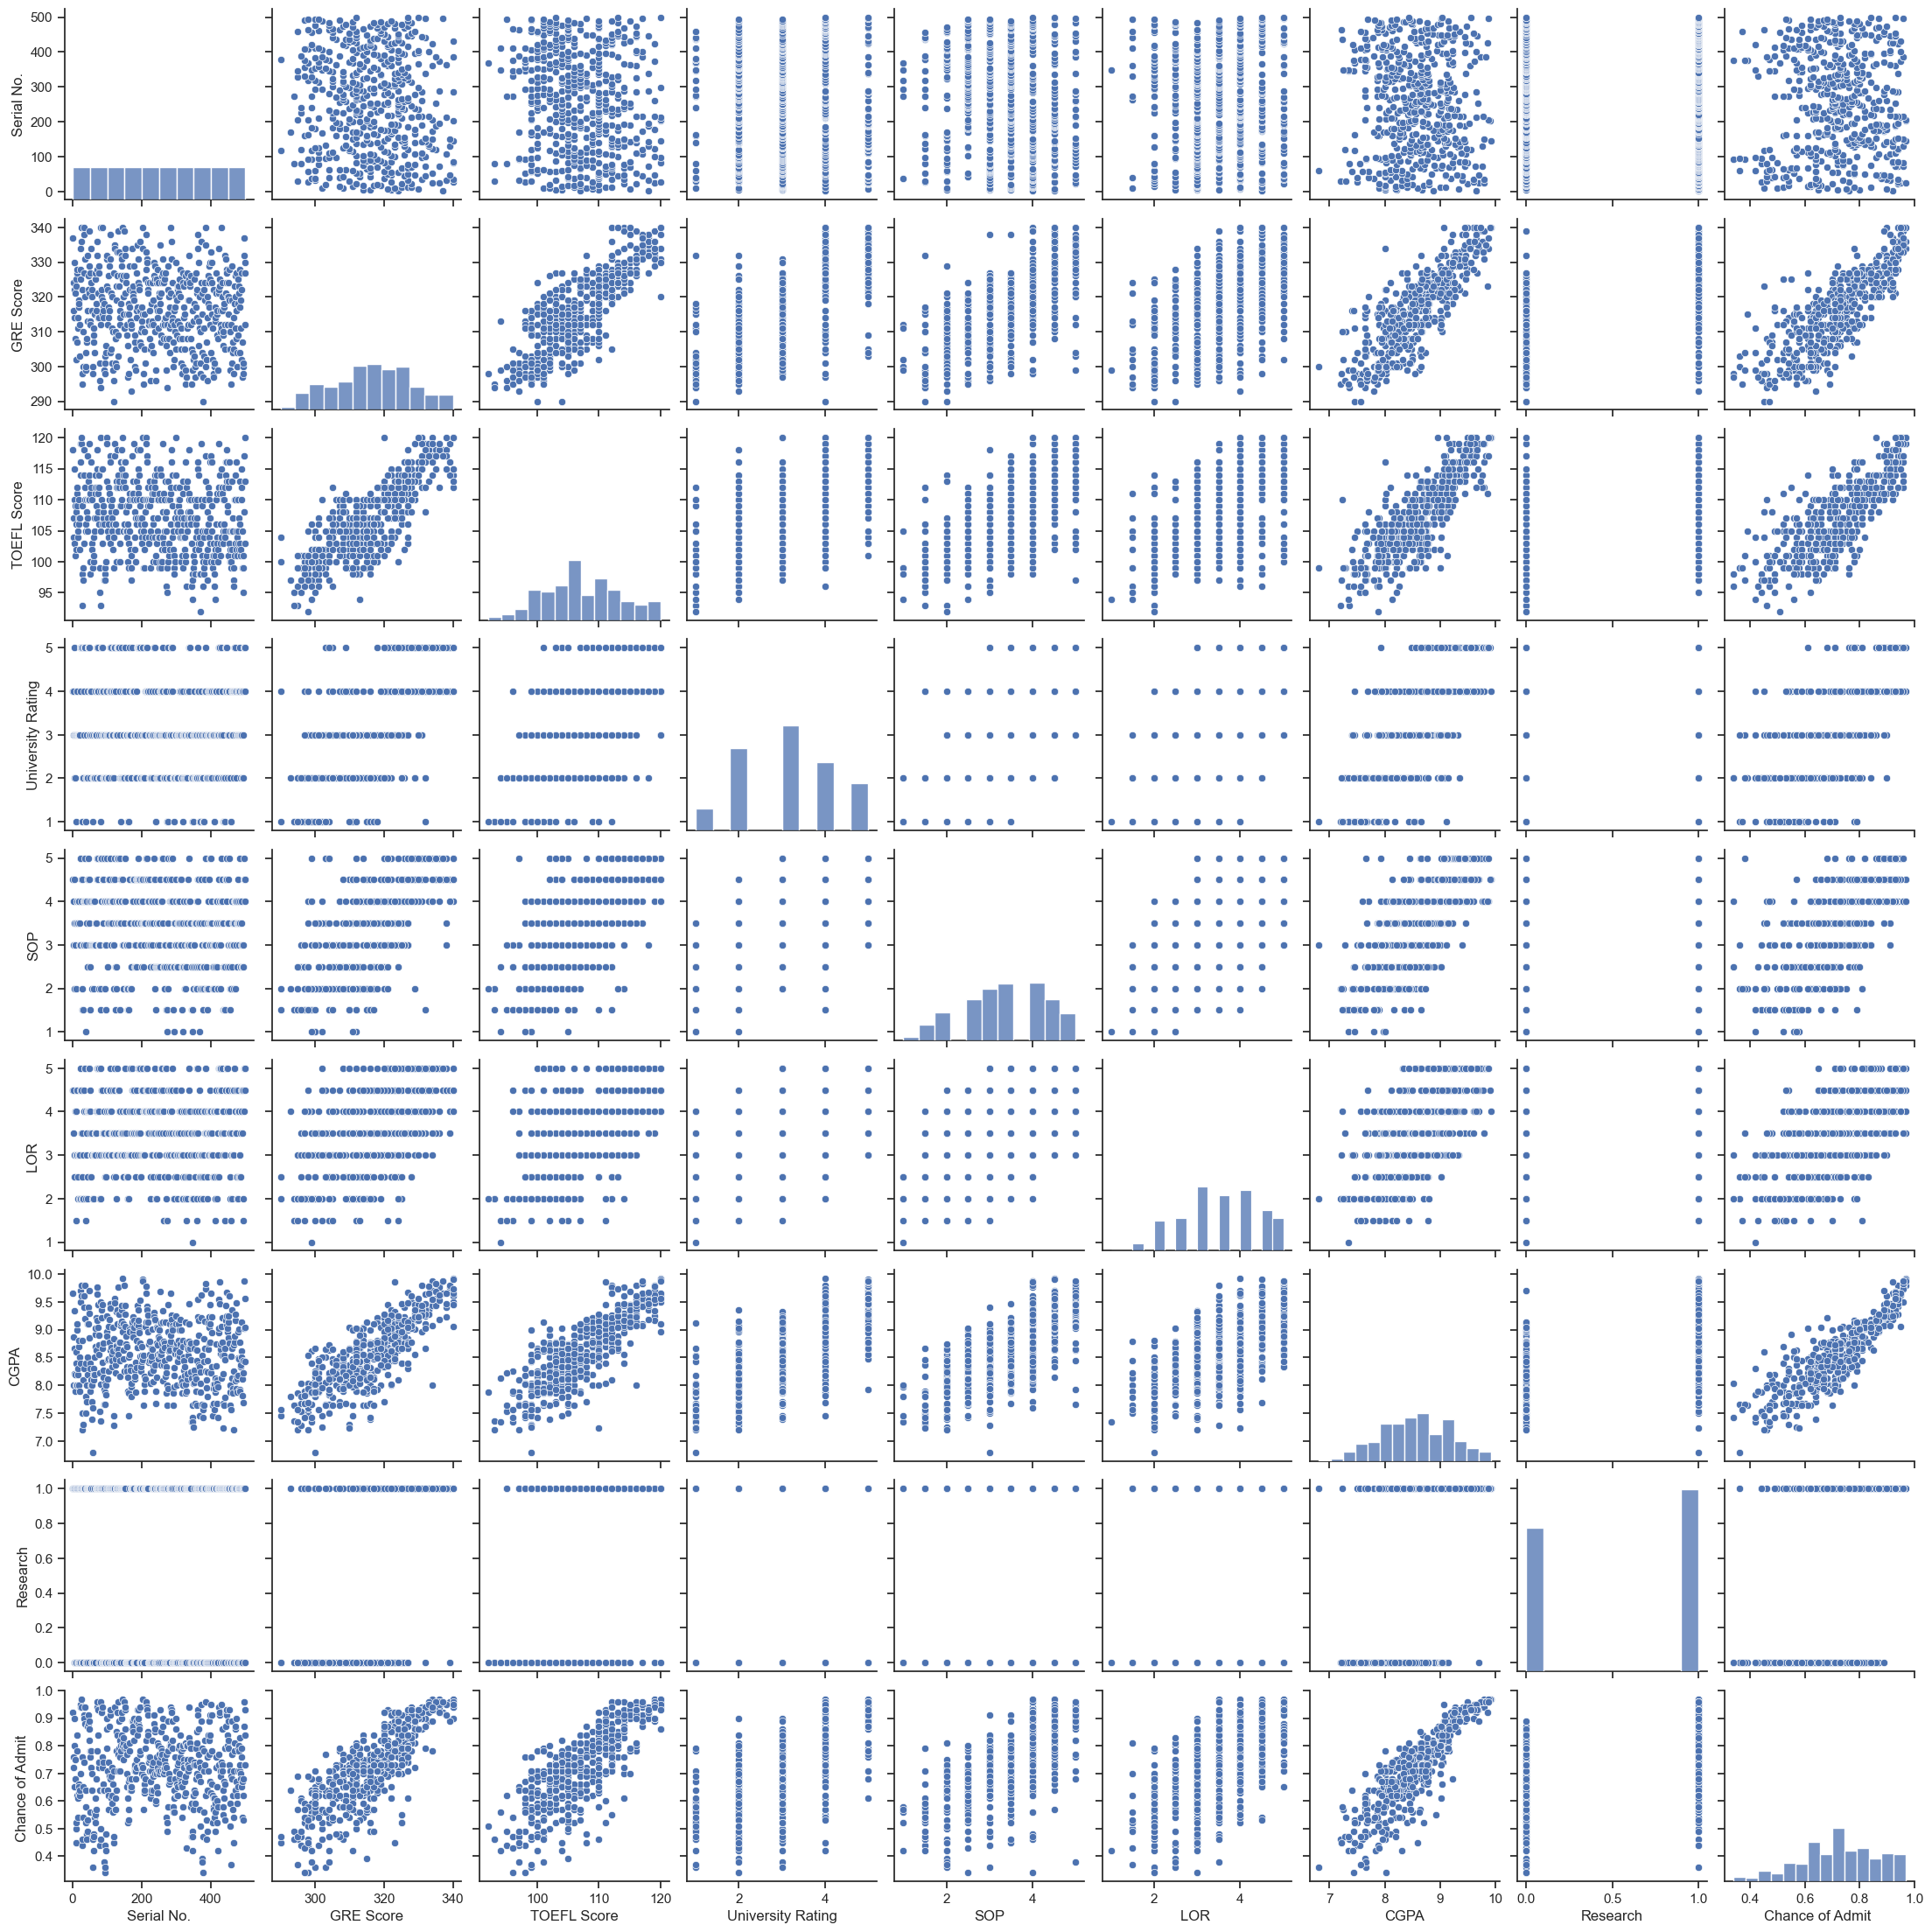

In [27]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(data)